In [1]:
import pandas as pd

base = pd.read_csv('./BankChurners.csv')

base.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
selected_columns = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Credit_Limit','Card_Category', 'Months_on_book', 'Total_Trans_Amt', 'Total_Trans_Ct']

filtered_data = base[selected_columns]

filtered_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Credit_Limit,Card_Category,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,12691.0,Blue,39,1144,42
1,49,F,5,Graduate,Single,Less than $40K,8256.0,Blue,44,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,3418.0,Blue,36,1887,20
3,40,F,4,High School,Unknown,Less than $40K,3313.0,Blue,34,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,4716.0,Blue,21,816,28


In [3]:

# filtered_data['Income_Category'] = df_category
# filtered_data['Marital_Status'] = df_status
# filtered_data['Education_Level'] = df_educatial

# filtered_data.replace("Unknown", -1, inplace=True)
filtered_data = filtered_data[~filtered_data.isin(['Unknown']).any(axis=1)]
# filtered_data['Income_Category'] = filtered_data['Income_Category'].str.replace(r"[$K]", "", regex=True)

filtered_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Credit_Limit,Card_Category,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,12691.0,Blue,39,1144,42
1,49,F,5,Graduate,Single,Less than $40K,8256.0,Blue,44,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,3418.0,Blue,36,1887,20
4,40,M,3,Uneducated,Married,$60K - $80K,4716.0,Blue,21,816,28
5,44,M,2,Graduate,Married,$40K - $60K,4010.0,Blue,36,1088,24


In [4]:
from sklearn.preprocessing import StandardScaler

data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Marital_Status', 'Education_Level', 'Card_Category', 'Income_Category'])


scaler = StandardScaler()

data_encoded[['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']]= scaler.fit_transform(data_encoded[['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']])

data_encoded.head()

,Customer_Age,Dependent_count,Credit_Limit,Months_on_book,Total_Trans_Amt,Total_Trans_Ct,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,...,Education_Level_Uneducated,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
0,45,3,0.460058,39,-0.937167,-0.945214,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
1,49,5,-0.025947,44,-0.894783,-1.323244,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,51,3,-0.556114,36,-0.722936,-1.869287,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
4,40,3,-0.413874,21,-1.031741,-1.533260,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
5,44,2,-0.491240,36,-0.953314,-1.701273,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False


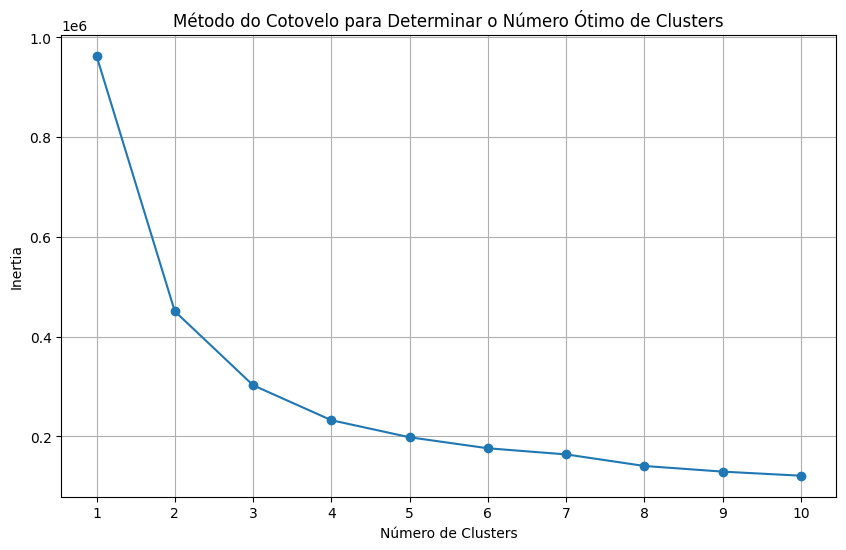

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

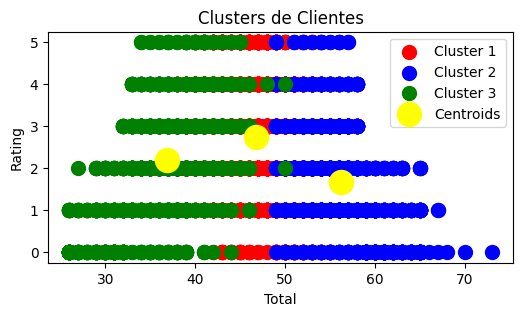

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

plt.figure(figsize=(6, 3))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()


In [7]:
filtered_data['Cluster'] = kmeans.labels_
cluster_distribution = filtered_data['Cluster'].value_counts().sort_index()

cluster_distribution

filtered_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Credit_Limit,Card_Category,Months_on_book,Total_Trans_Amt,Total_Trans_Ct,Cluster
0,45,M,3,High School,Married,$60K - $80K,12691.0,Blue,39,1144,42,0
1,49,F,5,Graduate,Single,Less than $40K,8256.0,Blue,44,1291,33,1
2,51,M,3,Graduate,Married,$80K - $120K,3418.0,Blue,36,1887,20,0
4,40,M,3,Uneducated,Married,$60K - $80K,4716.0,Blue,21,816,28,2
5,44,M,2,Graduate,Married,$40K - $60K,4010.0,Blue,36,1088,24,0


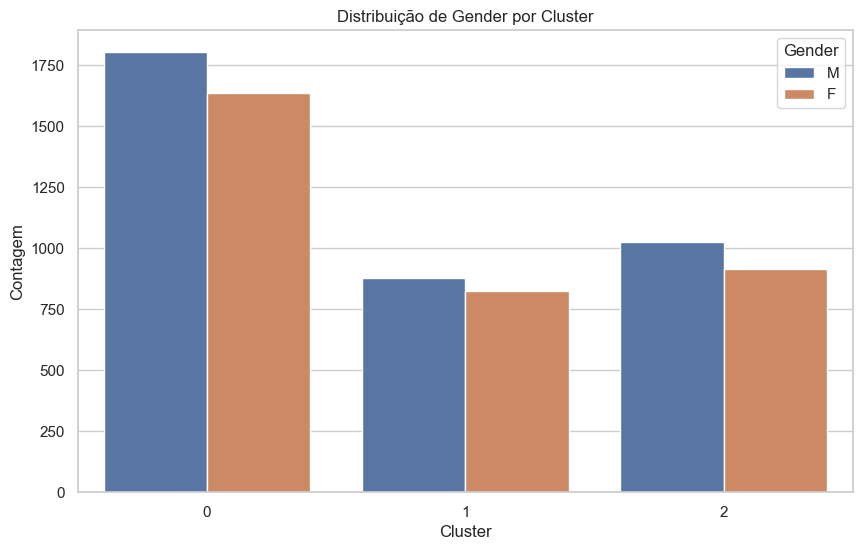

In [8]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=filtered_data)
plt.title('Distribuição de Gender por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()

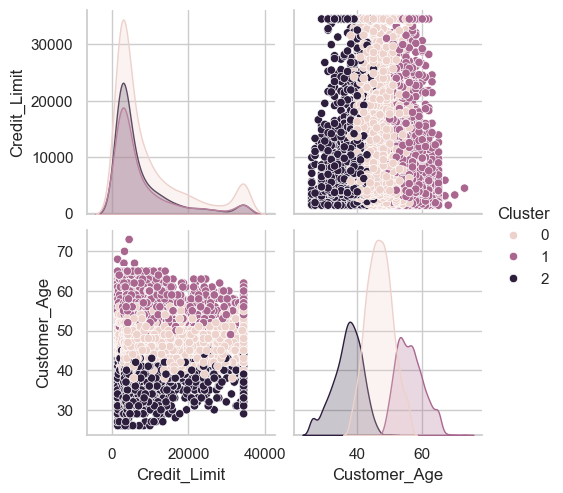

In [9]:

data_for_pairplot = filtered_data[['Cluster', 'Credit_Limit', 'Customer_Age']]

sns.pairplot(data_for_pairplot, hue='Cluster')
plt.show()

<Axes: xlabel='Education_Level', ylabel='Income_Category'>

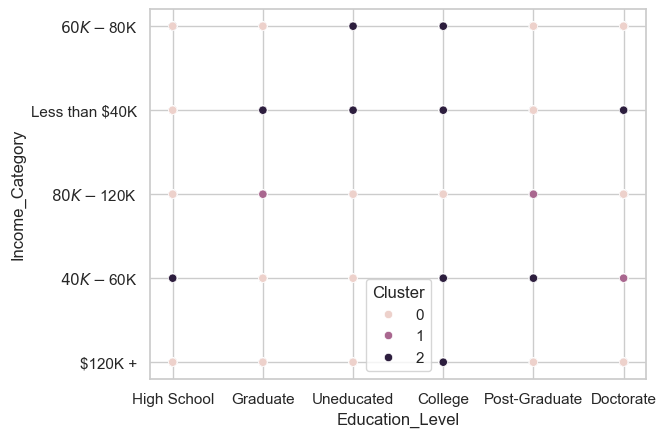

In [10]:
sns.scatterplot(x="Education_Level", y="Income_Category", data=filtered_data, hue="Cluster")

<Axes: xlabel='Cluster', ylabel='Total_Trans_Ct'>

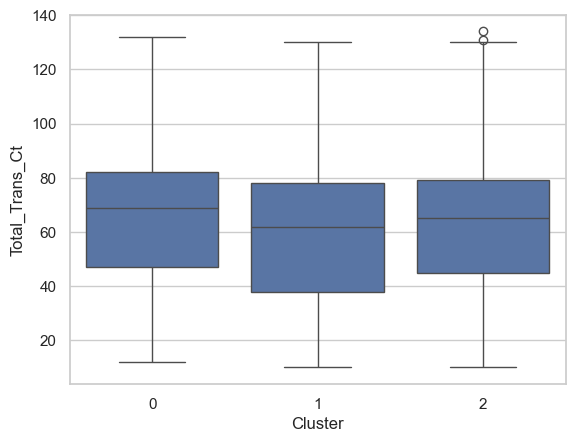

In [11]:
sns.boxplot(x="Cluster", y="Total_Trans_Ct", data=filtered_data)

<Axes: xlabel='Total_Trans_Amt', ylabel='Density'>

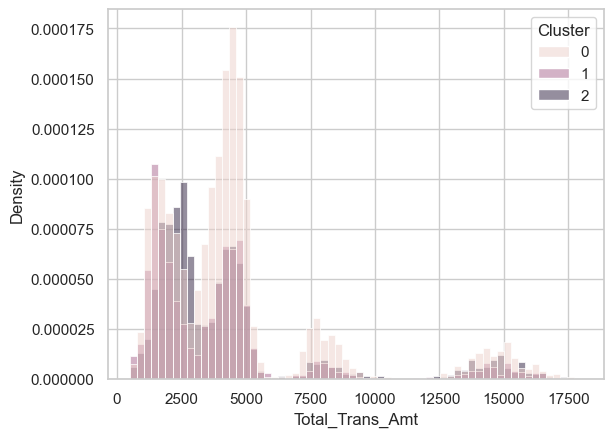

In [12]:

sns.histplot(data=filtered_data, x="Total_Trans_Amt", hue="Cluster", stat='density')

Empty DataFrame
Columns: [Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Credit_Limit, Card_Category, Months_on_book, Total_Trans_Amt, Total_Trans_Ct, Cluster]
Index: []


<Axes: xlabel='Cluster', ylabel='Credit_Limit'>

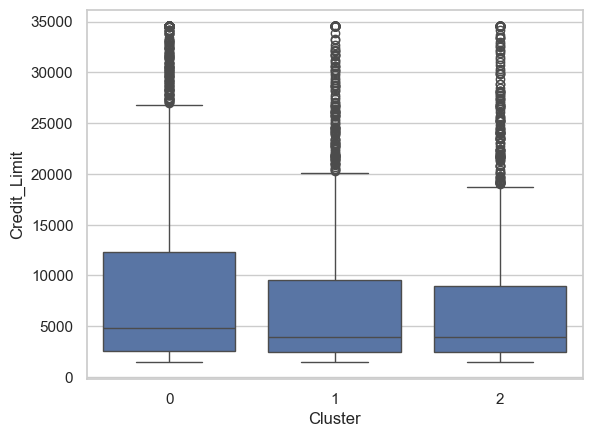

In [16]:
# verifica quantos dados ausentes tem
filtered_data.isnull().sum()

#imprime as linhas faltantes
print(filtered_data[filtered_data.isnull().any(axis=1)])

sns.boxplot(y='Credit_Limit', x='Cluster', data=filtered_data)

In [17]:
# imprime linhas duplicadas imprimindo só as copias
print(filtered_data[filtered_data.duplicated()])
# imprime todas as linhas duplicadas 


print(filtered_data[filtered_data.duplicated(keep=False)])

Empty DataFrame
Columns: [Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Credit_Limit, Card_Category, Months_on_book, Total_Trans_Amt, Total_Trans_Ct, Cluster]
Index: []


In [18]:
# remove as linhas duplicadas
filtered_data = filtered_data.drop_duplicates()